# Data Cleaning and EDA

### Let's clean and analyze our data and prepare it for modeling

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

### Read in both Nike and Adidas csvs

In [2]:
nike_df = pd.read_csv('../data/Nike.csv')

adidas_df = pd.read_csv('../data/Adidas.csv')

## Nike dataframe cleaning and EDA

In [3]:
nike_df.head()

,Unnamed: 0,author,comments,created,score,subreddit,subscribers,text,title,url
0,0,jeremec,1,1.456352e+09,18,Nike,11043,Please note that any product from a previous s...,Tips for identifying Nike Product,https://www.reddit.com/r/Nike/comments/47fex4/...
1,1,lavienstyle,2,1.545215e+09,8,Nike,11043,NaN,What’s this called?,https://i.redd.it/hjnoz5gqo7521.jpg
2,2,azndkflush,0,1.545232e+09,1,Nike,11043,NaN,[LC] OW NIKE PRESTO :D!,https://imgur.com/gallery/Aykz7YX
3,3,hiding_in_NJ,2,1.545150e+09,49,Nike,11043,NaN,3D printed Jordan 1s by me,https://i.redd.it/j4oaab0za2521.jpg
4,4,nitr0h,0,1.545203e+09,2,Nike,11043,http://www.jimmyjazz.com/boys/clothing/nike-bl...,need help finding this tracksuit in mens,https://www.reddit.com/r/Nike/comments/a7k2nd/...


**Drop `Unnamed: 0` column**

In [4]:
nike_df.drop('Unnamed: 0', axis=1, inplace=True)

**Change column order**

In [5]:
# Moving the subreddit column to the end for the eventual merge with the Adidas dataframe
# This will be the y_value
nike_df = nike_df[['author', 'comments', 'created', 'score', 'subscribers', 'text', 'title', 'url', 'subreddit']]
nike_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,1,1.456352e+09,18,11043,Please note that any product from a previous s...,Tips for identifying Nike Product,https://www.reddit.com/r/Nike/comments/47fex4/...,Nike
1,lavienstyle,2,1.545215e+09,8,11043,NaN,What’s this called?,https://i.redd.it/hjnoz5gqo7521.jpg,Nike
2,azndkflush,0,1.545232e+09,1,11043,NaN,[LC] OW NIKE PRESTO :D!,https://imgur.com/gallery/Aykz7YX,Nike
3,hiding_in_NJ,2,1.545150e+09,49,11043,NaN,3D printed Jordan 1s by me,https://i.redd.it/j4oaab0za2521.jpg,Nike
4,nitr0h,0,1.545203e+09,2,11043,http://www.jimmyjazz.com/boys/clothing/nike-bl...,need help finding this tracksuit in mens,https://www.reddit.com/r/Nike/comments/a7k2nd/...,Nike


**Check for, explore and handle null values**

In [6]:
# Check dataframe for total amount of null values
nike_df.isnull().sum()

author           0
comments         0
created          0
score            0
subscribers      0
text           694
title            0
url              0
subreddit        0
dtype: int64

In [7]:
# Replace null values in dataframe
nike_df.fillna('0', inplace=True)

In [8]:
# Check to see if replace was successful
nike_df.isnull().sum()

author         0
comments       0
created        0
score          0
subscribers    0
text           0
title          0
url            0
subreddit      0
dtype: int64

**Summary Statistics**

In [9]:
nike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
author         999 non-null object
comments       999 non-null int64
created        999 non-null float64
score          999 non-null int64
subscribers    999 non-null int64
text           999 non-null object
title          999 non-null object
url            999 non-null object
subreddit      999 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 70.3+ KB


All columns types are appropriate, but the `created` column is in scientific notation in the dataframe and we want to clean that up so we will convert the dtype of `nike['created']` into integers.

In [10]:
nike_df['created'] = nike_df['created'].astype(int)

In [11]:
# Now the numbers in the created column are no longer in scientific notation
nike_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,1,1456352296,18,11043,Please note that any product from a previous s...,Tips for identifying Nike Product,https://www.reddit.com/r/Nike/comments/47fex4/...,Nike
1,lavienstyle,2,1545215250,8,11043,0,What’s this called?,https://i.redd.it/hjnoz5gqo7521.jpg,Nike
2,azndkflush,0,1545232035,1,11043,0,[LC] OW NIKE PRESTO :D!,https://imgur.com/gallery/Aykz7YX,Nike
3,hiding_in_NJ,2,1545150078,49,11043,0,3D printed Jordan 1s by me,https://i.redd.it/j4oaab0za2521.jpg,Nike
4,nitr0h,0,1545202806,2,11043,http://www.jimmyjazz.com/boys/clothing/nike-bl...,need help finding this tracksuit in mens,https://www.reddit.com/r/Nike/comments/a7k2nd/...,Nike


The integer in the `created` column indicates a unix timestamp which indicates how old a post is in seconds since its creation. The base epoch year of creation begins in 1970. The `lambda` function below converts all integers in the `created` column into another integer indicating the number of weeks after the epoch year that the post was created. The `lambda` function takes the integer, `x`, and divides it by the number of seconds in a week. 

In [12]:
nike_df['created'] = nike_df['created'].map(lambda x: int(x/604800))

In [187]:
nike_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,1,2407,18,11043,Please note that any product from a previous s...,Tips for identifying Nike Product,https://www.reddit.com/r/Nike/comments/47fex4/...,Nike
1,lavienstyle,2,2554,8,11043,0,What’s this called?,https://i.redd.it/hjnoz5gqo7521.jpg,Nike
2,azndkflush,0,2554,1,11043,0,[LC] OW NIKE PRESTO :D!,https://imgur.com/gallery/Aykz7YX,Nike
3,hiding_in_NJ,2,2554,49,11043,0,3D printed Jordan 1s by me,https://i.redd.it/j4oaab0za2521.jpg,Nike
4,nitr0h,0,2554,2,11043,http://www.jimmyjazz.com/boys/clothing/nike-bl...,need help finding this tracksuit in mens,https://www.reddit.com/r/Nike/comments/a7k2nd/...,Nike


In [14]:
nike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
comments,999.0,2.899900,4.163010,0.0,0.0,2.0,4.0,41.0
created,999.0,2544.474474,7.200054,2407.0,2540.0,2544.0,2550.0,2554.0
score,999.0,8.817818,16.561201,0.0,1.0,2.0,8.0,173.0
subscribers,999.0,11043.000000,0.000000,11043.0,11043.0,11043.0,11043.0,11043.0


**Plot distributions for appropriate numeric columns**

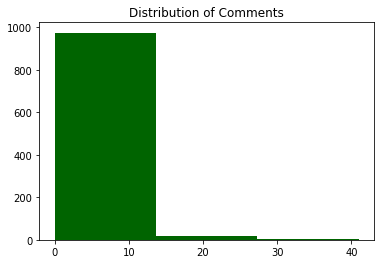

In [15]:
plt.title('Distribution of Comments')
plt.hist(nike_df['comments'], bins=3, color='darkgreen');

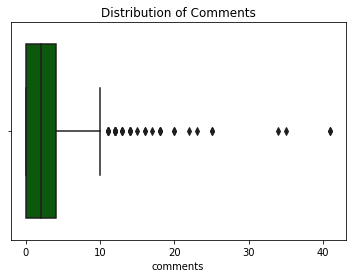

In [16]:
plt.title('Distribution of Comments')
sns.boxplot(nike_df['comments'], color='darkgreen');

**In the case of number of comments on a given post, the outliers are not inherently significant to 'fix'.**

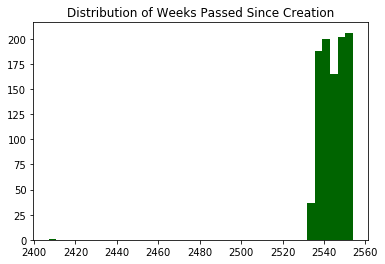

In [17]:
plt.title('Distribution of Weeks Passed Since Creation')
plt.hist(nike_df['created'], bins=40, color='darkgreen');

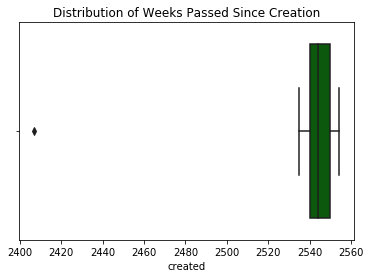

In [166]:
plt.title('Distribution of Weeks Passed Since Creation')
sns.boxplot(nike_df['created'], color='darkgreen');

The outlier above represents a stickied post. A stickied post is created by a moderator of the subreddit that sticks this post at the beginning of the subreddit so it cannot be moved. A stickied post is normally created closer to the origination of the subreddit so it makes sense that this post is newer than the others in the subreddit.

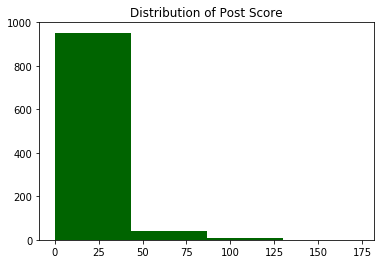

In [43]:
plt.title('Distribution of Post Score')
plt.hist(nike_df['score'], bins=4, color='darkgreen');

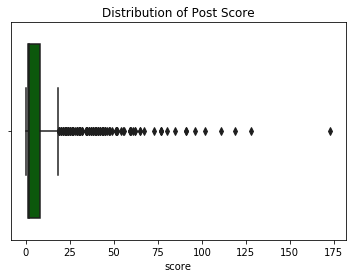

In [44]:
plt.title('Distribution of Post Score')
sns.boxplot(nike_df['score'], color='darkgreen');

A given posts score is calculated by `post_upvotes - post_downvotes`. Posts with high scores are the posts with the most net upvotes.

## Adidas dataframe cleaning and EDA

In [19]:
adidas_df.head()

,Unnamed: 0,author,comments,created,score,subreddit,subscribers,text,title,url
0,0,jeremec,0,1.513752e+09,18,adidas,9666,"With holidays coming around, and a lot of big ...",Just a friendly holiday reminder about CS ques...,https://www.reddit.com/r/adidas/comments/7kzpb...
1,1,lavienstyle,5,1.545224e+09,8,adidas,9666,I have pair of Alphabounces that I think are j...,How warm are the Ultra Boosts?,https://www.reddit.com/r/adidas/comments/a7m6t...
2,2,azndkflush,0,1.545176e+09,1,adidas,9666,NaN,Here's my (Small) collection!,https://imgur.com/a/3uEHrDf
3,3,hiding_in_NJ,1,1.545158e+09,49,adidas,9666,NaN,ID on these. Says they're 08/03.,https://imgur.com/Oi5Dz5G
4,4,nitr0h,9,1.545120e+09,2,adidas,9666,NaN,Awkward flex .,https://i.redd.it/wln7dfhruz421.jpg


**Drop `Unnamed: 0` column**

In [20]:
adidas_df.drop('Unnamed: 0', axis=1, inplace=True)

**Change column order**

In [21]:
# Moving the subreddit column to the end for the eventual merge with the Nike dataframe
# This will be the y_value
adidas_df = adidas_df[['author', 'comments', 'created', 'score', 'subscribers', 'text', 'title', 'url', 'subreddit']]
adidas_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,0,1.513752e+09,18,9666,"With holidays coming around, and a lot of big ...",Just a friendly holiday reminder about CS ques...,https://www.reddit.com/r/adidas/comments/7kzpb...,adidas
1,lavienstyle,5,1.545224e+09,8,9666,I have pair of Alphabounces that I think are j...,How warm are the Ultra Boosts?,https://www.reddit.com/r/adidas/comments/a7m6t...,adidas
2,azndkflush,0,1.545176e+09,1,9666,NaN,Here's my (Small) collection!,https://imgur.com/a/3uEHrDf,adidas
3,hiding_in_NJ,1,1.545158e+09,49,9666,NaN,ID on these. Says they're 08/03.,https://imgur.com/Oi5Dz5G,adidas
4,nitr0h,9,1.545120e+09,2,9666,NaN,Awkward flex .,https://i.redd.it/wln7dfhruz421.jpg,adidas


**Check for, explore and handle null values**

In [22]:
# Check dataframe for total amount of null values
adidas_df.isnull().sum()

author           0
comments         0
created          0
score            0
subscribers      0
text           613
title            0
url              0
subreddit        0
dtype: int64

In [23]:
# Replace null values in dataframe
adidas_df.fillna('0', inplace=True)

In [24]:
# Check to see if replace was successful
adidas_df.isnull().sum()

author         0
comments       0
created        0
score          0
subscribers    0
text           0
title          0
url            0
subreddit      0
dtype: int64

**Summary Statistics**

In [25]:
adidas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 9 columns):
author         992 non-null object
comments       992 non-null int64
created        992 non-null float64
score          992 non-null int64
subscribers    992 non-null int64
text           992 non-null object
title          992 non-null object
url            992 non-null object
subreddit      992 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 69.8+ KB


All columns types are appropriate, but the `created` column ids in scientific notation in the dataframe and we want to clean that up so we will convert the dtype of `adidas['created']` into integers.

In [26]:
adidas_df['created'] = adidas_df['created'].astype(int)

In [27]:
# Now the numbers in the created column are no longer in scientific notation
adidas_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,0,1513752356,18,9666,"With holidays coming around, and a lot of big ...",Just a friendly holiday reminder about CS ques...,https://www.reddit.com/r/adidas/comments/7kzpb...,adidas
1,lavienstyle,5,1545224346,8,9666,I have pair of Alphabounces that I think are j...,How warm are the Ultra Boosts?,https://www.reddit.com/r/adidas/comments/a7m6t...,adidas
2,azndkflush,0,1545176462,1,9666,0,Here's my (Small) collection!,https://imgur.com/a/3uEHrDf,adidas
3,hiding_in_NJ,1,1545158013,49,9666,0,ID on these. Says they're 08/03.,https://imgur.com/Oi5Dz5G,adidas
4,nitr0h,9,1545120429,2,9666,0,Awkward flex .,https://i.redd.it/wln7dfhruz421.jpg,adidas


The integer in the `created` column indicates a unix timestamp which indicates how old a post is in seconds since its creation. The base epoch year of creation begins in 1970. The `lambda` function below converts all integers in the `created` column into another integer indicating the number of weeks after the epoch year that the post was created. The `lambda` function takes the integer, `x`, and divides it by the number of seconds in a week. 

In [28]:
adidas_df['created'] = adidas_df['created'].map(lambda x: int(x/604800))

In [188]:
adidas_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,0,2502,18,9666,"With holidays coming around, and a lot of big ...",Just a friendly holiday reminder about CS ques...,https://www.reddit.com/r/adidas/comments/7kzpb...,adidas
1,lavienstyle,5,2554,8,9666,I have pair of Alphabounces that I think are j...,How warm are the Ultra Boosts?,https://www.reddit.com/r/adidas/comments/a7m6t...,adidas
2,azndkflush,0,2554,1,9666,0,Here's my (Small) collection!,https://imgur.com/a/3uEHrDf,adidas
3,hiding_in_NJ,1,2554,49,9666,0,ID on these. Says they're 08/03.,https://imgur.com/Oi5Dz5G,adidas
4,nitr0h,9,2554,2,9666,0,Awkward flex .,https://i.redd.it/wln7dfhruz421.jpg,adidas


In [30]:
adidas_df.describe().T

,count,mean,std,min,25%,50%,75%,max
comments,992.0,4.439516,4.861178,0.0,1.0,3.0,6.00,46.0
created,992.0,2543.606855,6.582449,2502.0,2538.0,2543.0,2549.25,2554.0
score,992.0,8.865927,16.608909,0.0,1.0,2.0,8.00,173.0
subscribers,992.0,9666.000000,0.000000,9666.0,9666.0,9666.0,9666.00,9666.0


**Plot distributions for appropriate numeric columns**

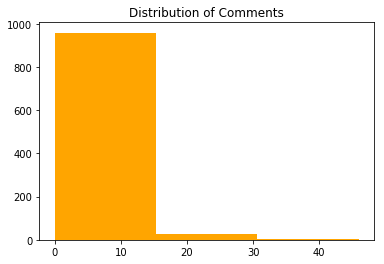

In [31]:
plt.title('Distribution of Comments')
plt.hist(adidas_df['comments'], bins=3, color='orange');

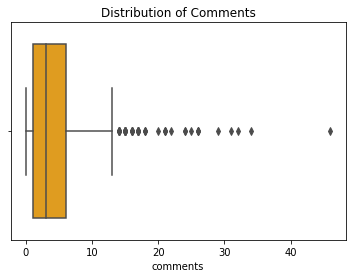

In [32]:
plt.title('Distribution of Comments')
sns.boxplot(adidas_df['comments'], color='orange');

**In the case of number of comments on a given post, the outliers are not inherently significant to 'fix'.**

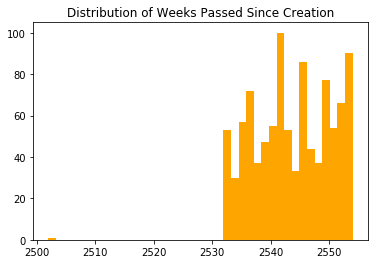

In [33]:
plt.title('Distribution of Weeks Passed Since Creation')
plt.hist(adidas_df['created'], bins=40, color='orange');

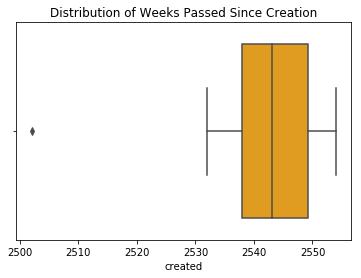

In [34]:
plt.title('Distribution of Weeks Passed Since Creation')
sns.boxplot(adidas_df['created'], color='orange');

The outlier above represents a stickied post. A stickied post is created by a moderator of the subreddit that sticks this post at the beginning of the subreddit so it cannot be moved. A stickied post is normally created closer to the origination of the subreddit so it makes sense that this post is newer than the others in the subreddit.

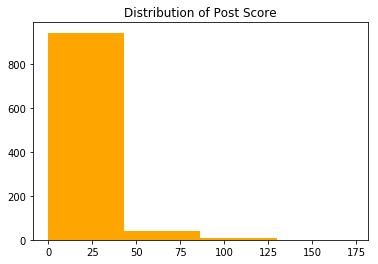

In [45]:
plt.title('Distribution of Post Score')
plt.hist(adidas_df['score'], bins=4, color='orange');

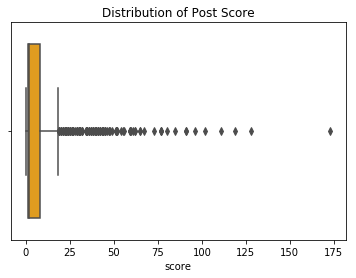

In [46]:
plt.title('Distribution of Post Score')
sns.boxplot(adidas_df['score'], color='orange');

A given posts score is calculated by `post_upvotes - post_downvotes`. Posts with high scores are the posts with the most net upvotes.

## Merge both dataframes

In [35]:
final_df = pd.merge(nike_df, adidas_df, how='outer',
                    left_on=['author', 'comments', 'created', 'score', 'subscribers', 'text', 'title', 'url', 'subreddit'], 
                    right_on=['author', 'comments', 'created', 'score', 'subscribers', 'text', 'title', 'url', 'subreddit'])

In [36]:
final_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,1,2407,18,11043,Please note that any product from a previous s...,Tips for identifying Nike Product,https://www.reddit.com/r/Nike/comments/47fex4/...,Nike
1,lavienstyle,2,2554,8,11043,0,What’s this called?,https://i.redd.it/hjnoz5gqo7521.jpg,Nike
2,azndkflush,0,2554,1,11043,0,[LC] OW NIKE PRESTO :D!,https://imgur.com/gallery/Aykz7YX,Nike
3,hiding_in_NJ,2,2554,49,11043,0,3D printed Jordan 1s by me,https://i.redd.it/j4oaab0za2521.jpg,Nike
4,nitr0h,0,2554,2,11043,http://www.jimmyjazz.com/boys/clothing/nike-bl...,need help finding this tracksuit in mens,https://www.reddit.com/r/Nike/comments/a7k2nd/...,Nike


In [37]:
final_df.shape

(1991, 9)

In [38]:
# Checking to see if the rows in both dataframes add up to the rows in the final dataframe
# Looks like everything checks out!
print(nike_df.shape)
print(adidas_df.shape)

(999, 9)
(992, 9)


### Binarize the subreddit column
### `Nike = 1` and `Adidas = 0`

In [39]:
# Lambda function that changes the text in the subreddit column
# Nike becomes a 1 and Adidas becomes a 0
final_df['subreddit'] = final_df['subreddit'].map(lambda x: 1 if x == 'Nike' else 0)

In [189]:
final_df.head()

,author,comments,created,score,subscribers,text,title,url,subreddit
0,jeremec,1,2407,18,11043,Please note that any product from a previous s...,tip for identifi nike product,https://www.reddit.com/r/Nike/comments/47fex4/...,1
1,lavienstyle,2,2554,8,11043,0,what thi called,https://i.redd.it/hjnoz5gqo7521.jpg,1
2,azndkflush,0,2554,1,11043,0,lc OW nike presto d,https://imgur.com/gallery/Aykz7YX,1
3,hiding_in_NJ,2,2554,49,11043,0,3D print jordan 1s by me,https://i.redd.it/j4oaab0za2521.jpg,1
4,nitr0h,0,2554,2,11043,http://www.jimmyjazz.com/boys/clothing/nike-bl...,need help find thi tracksuit in men,https://www.reddit.com/r/Nike/comments/a7k2nd/...,1


## With the final dataframe, let's lemmatize the words in the `final_df['title']` column using Stem
### We do this to shorten the words to combine similar forms of the same word to create cleaner data for our eventual CountVectorizer transformer

**First we need to Tokenize**

Instead of importing the tokenizer library from sklearn, we will just split each row by white space using list comprehension.

In [53]:
# Setting tokenized words to a variable
tokenized_words = [x.split(' ') for x in final_df['title']]

In [114]:
tokenized_words[0][0]

'Tips'

**Now let's bring in Stemmer**

We chose to use Stemmer instead of WordLemmatizer because Stemmer has a stronger penalty on getting the lemm of words.

In [54]:
# Import PortStemmer
from nltk.stem.porter import PorterStemmer

In [55]:
# Instantiate PortStemmer
stemmer = PorterStemmer()

In [129]:
# For loop that will take all of the words in each list of the tokenized_words list, stem them, remove all 
# non letter/digit characters and place them back into a a new list called stemmed_titles

import re # Import regex

stemmed_titles = []
for all_lists in tokenized_words:
    empty_list = []
    for word in all_lists:
        empty_list.append(re.sub("[^a-zA-Z0-9]", '', stemmer.stem(word)))
    stemmed_titles.append(empty_list)


In [192]:
# For loop that will join all of the strings in each list

joined_titles = []
for lists in stemmed_titles:
    joined_titles.append(' '.join(lists))


In [191]:
# Place new lists of stemmed words into the 'title' column in the final dataframe
final_df['title'] = joined_titles

# Check to see that the 'title' column is how it should look
final_df[['title']].head()

,title
0,tip for identifi nike product
1,what thi called
2,lc OW nike presto d
3,3D print jordan 1s by me
4,need help find thi tracksuit in men


In [161]:
# created a csv of the finalized dataframe
final_df.to_csv('../data/Nike_Adidas_combined.csv')

### We have collected, analyzed and cleaned relevant data concerning reddit posts about Nike and Adidas. Now we are ready to model!